In [267]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings(action = 'ignore')

In [270]:
df = pd.read_csv('../Data/cardio_train.csv', sep = ';')

## Data description

There are 3 types of input features:

Objective: factual information;

Examination: results of medical examination;

Subjective: information given by the patient.

### Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [271]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [272]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [273]:
df.shape

(70000, 13)

This dataset has 70000 rows and 13 columns.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [276]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [277]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [280]:
df.drop(columns = 'id', axis = 1, inplace = True)

In [281]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features : ")
print(all_col)
print("\nNumercal features : ")
print(num_col)
print("\nCategorical features : ")
print(cat_col)

All features : 
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Numercal features : 
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Categorical features : 
[]


# Clean the dataset

In [282]:
df1 = df.copy()

In [283]:
df1.duplicated().sum()

24

There are 24 duplicate values in that dataset.

In [285]:
df1.drop_duplicates(inplace = True)

In [286]:
df1.duplicated().sum()

0

In [287]:
df1.shape

(69976, 12)

After drop the duplicate values we have 69976 rows and 12 columns.

In [288]:
df2 = df1.copy()

In [289]:
df2.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

This data set doesn't contain any null values.

In [290]:
df2[df2.isnull().any(axis = 1)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [291]:
for i in all_col:
    print(i)
    print(np.sort(df2[i].unique()))
    print('\n')

age
[10798 10859 10878 ... 23692 23701 23713]


gender
[1 2]


height
[ 55  57  59  60  64  65  66  67  68  70  71  72  74  75  76  80  81  91
  96  97  98  99 100 104 105 108 109 110 111 112 113 117 119 120 122 125
 128 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200 207
 250]


weight
[ 10.    11.    21.    22.    23.    28.    29.    30.    31.    32.
  33.    34.    35.    35.45  36.    37.    38.    39.    40.    41.
  42.    42.2   43.    44.    45.    45.8   46.    47.    48.    49.
  50.    50.5   50.7   51.    51.5   52.    52.3   53.    53.2   53.3
  53.5   53.6   53.67  53.9   54.    54.35  54.5   54.9   55.    55.2
  55.4   55.6   56.    56.2   57.    57.4   57.6   57.8   58.    58.5
  58.7   58.8   59.    59.2   59.5   59.8   60.    60.1   60

age


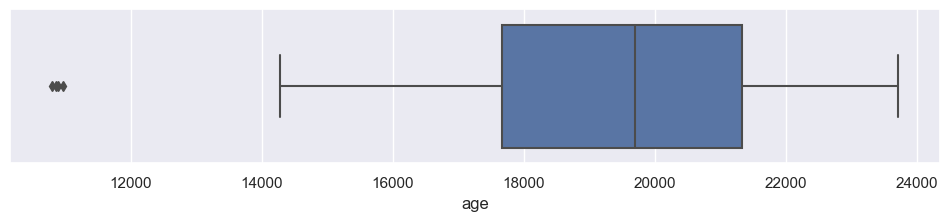

gender


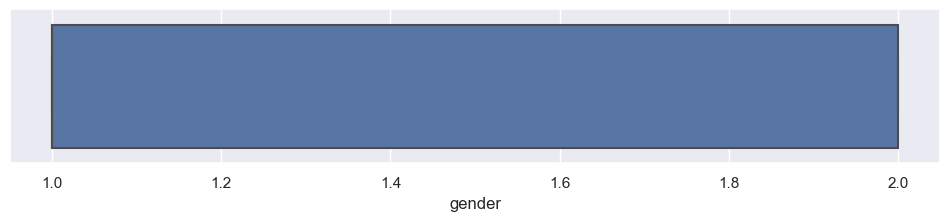

height


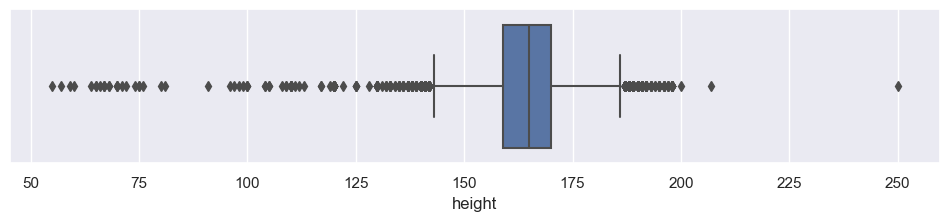

weight


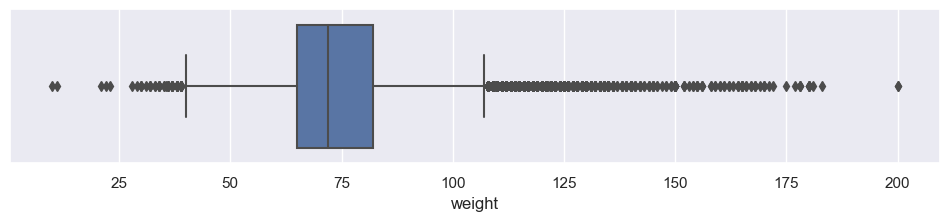

ap_hi


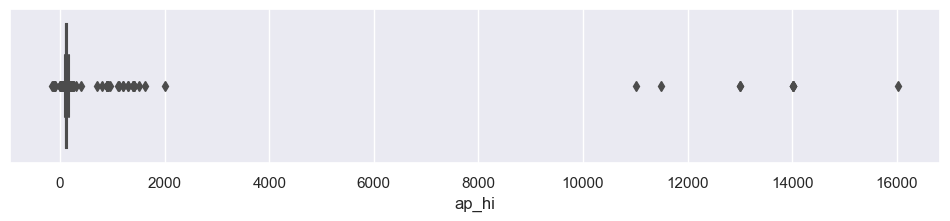

ap_lo


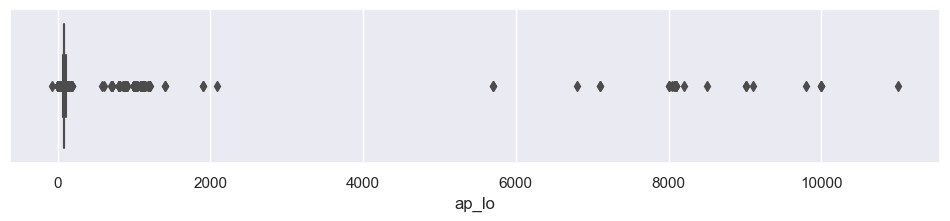

cholesterol


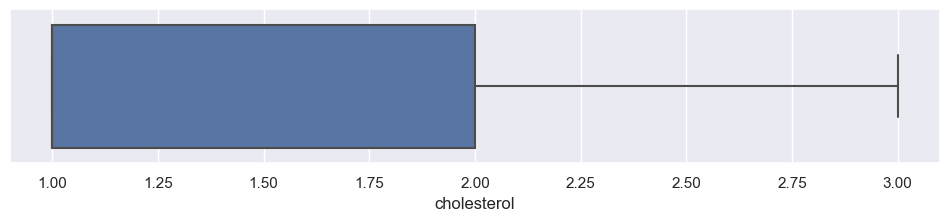

gluc


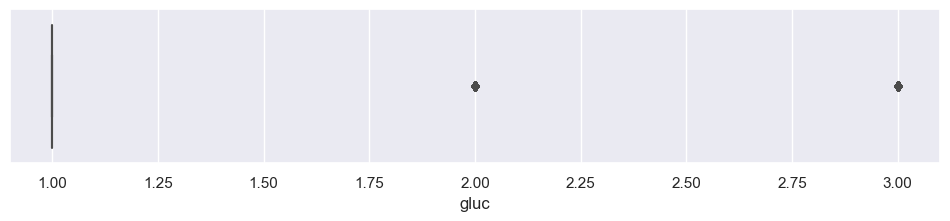

smoke


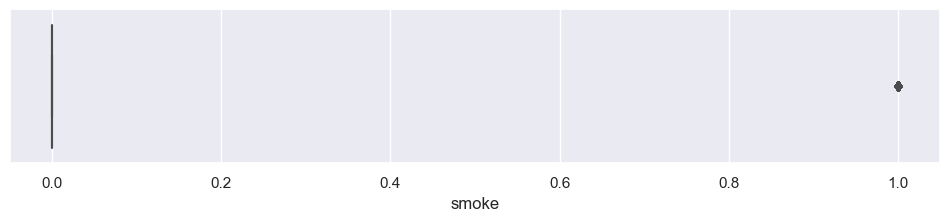

alco


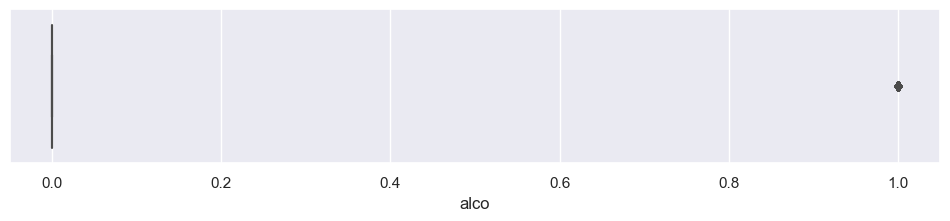

active


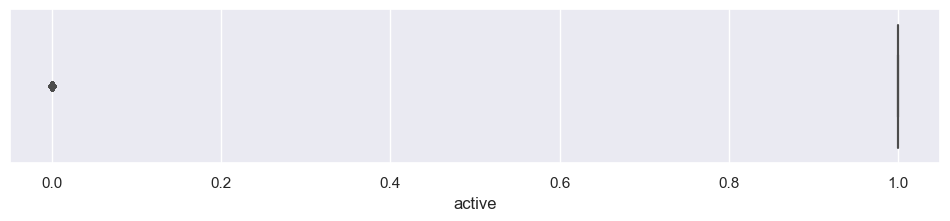

cardio


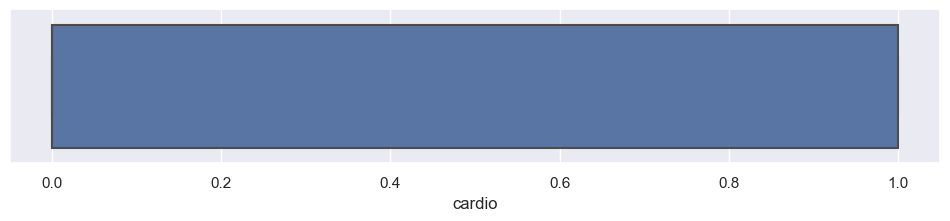

In [292]:
for i in num_col:
    print(i)
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(x = df2[i])
    plt.show()

<Figure size 3000x3000 with 0 Axes>

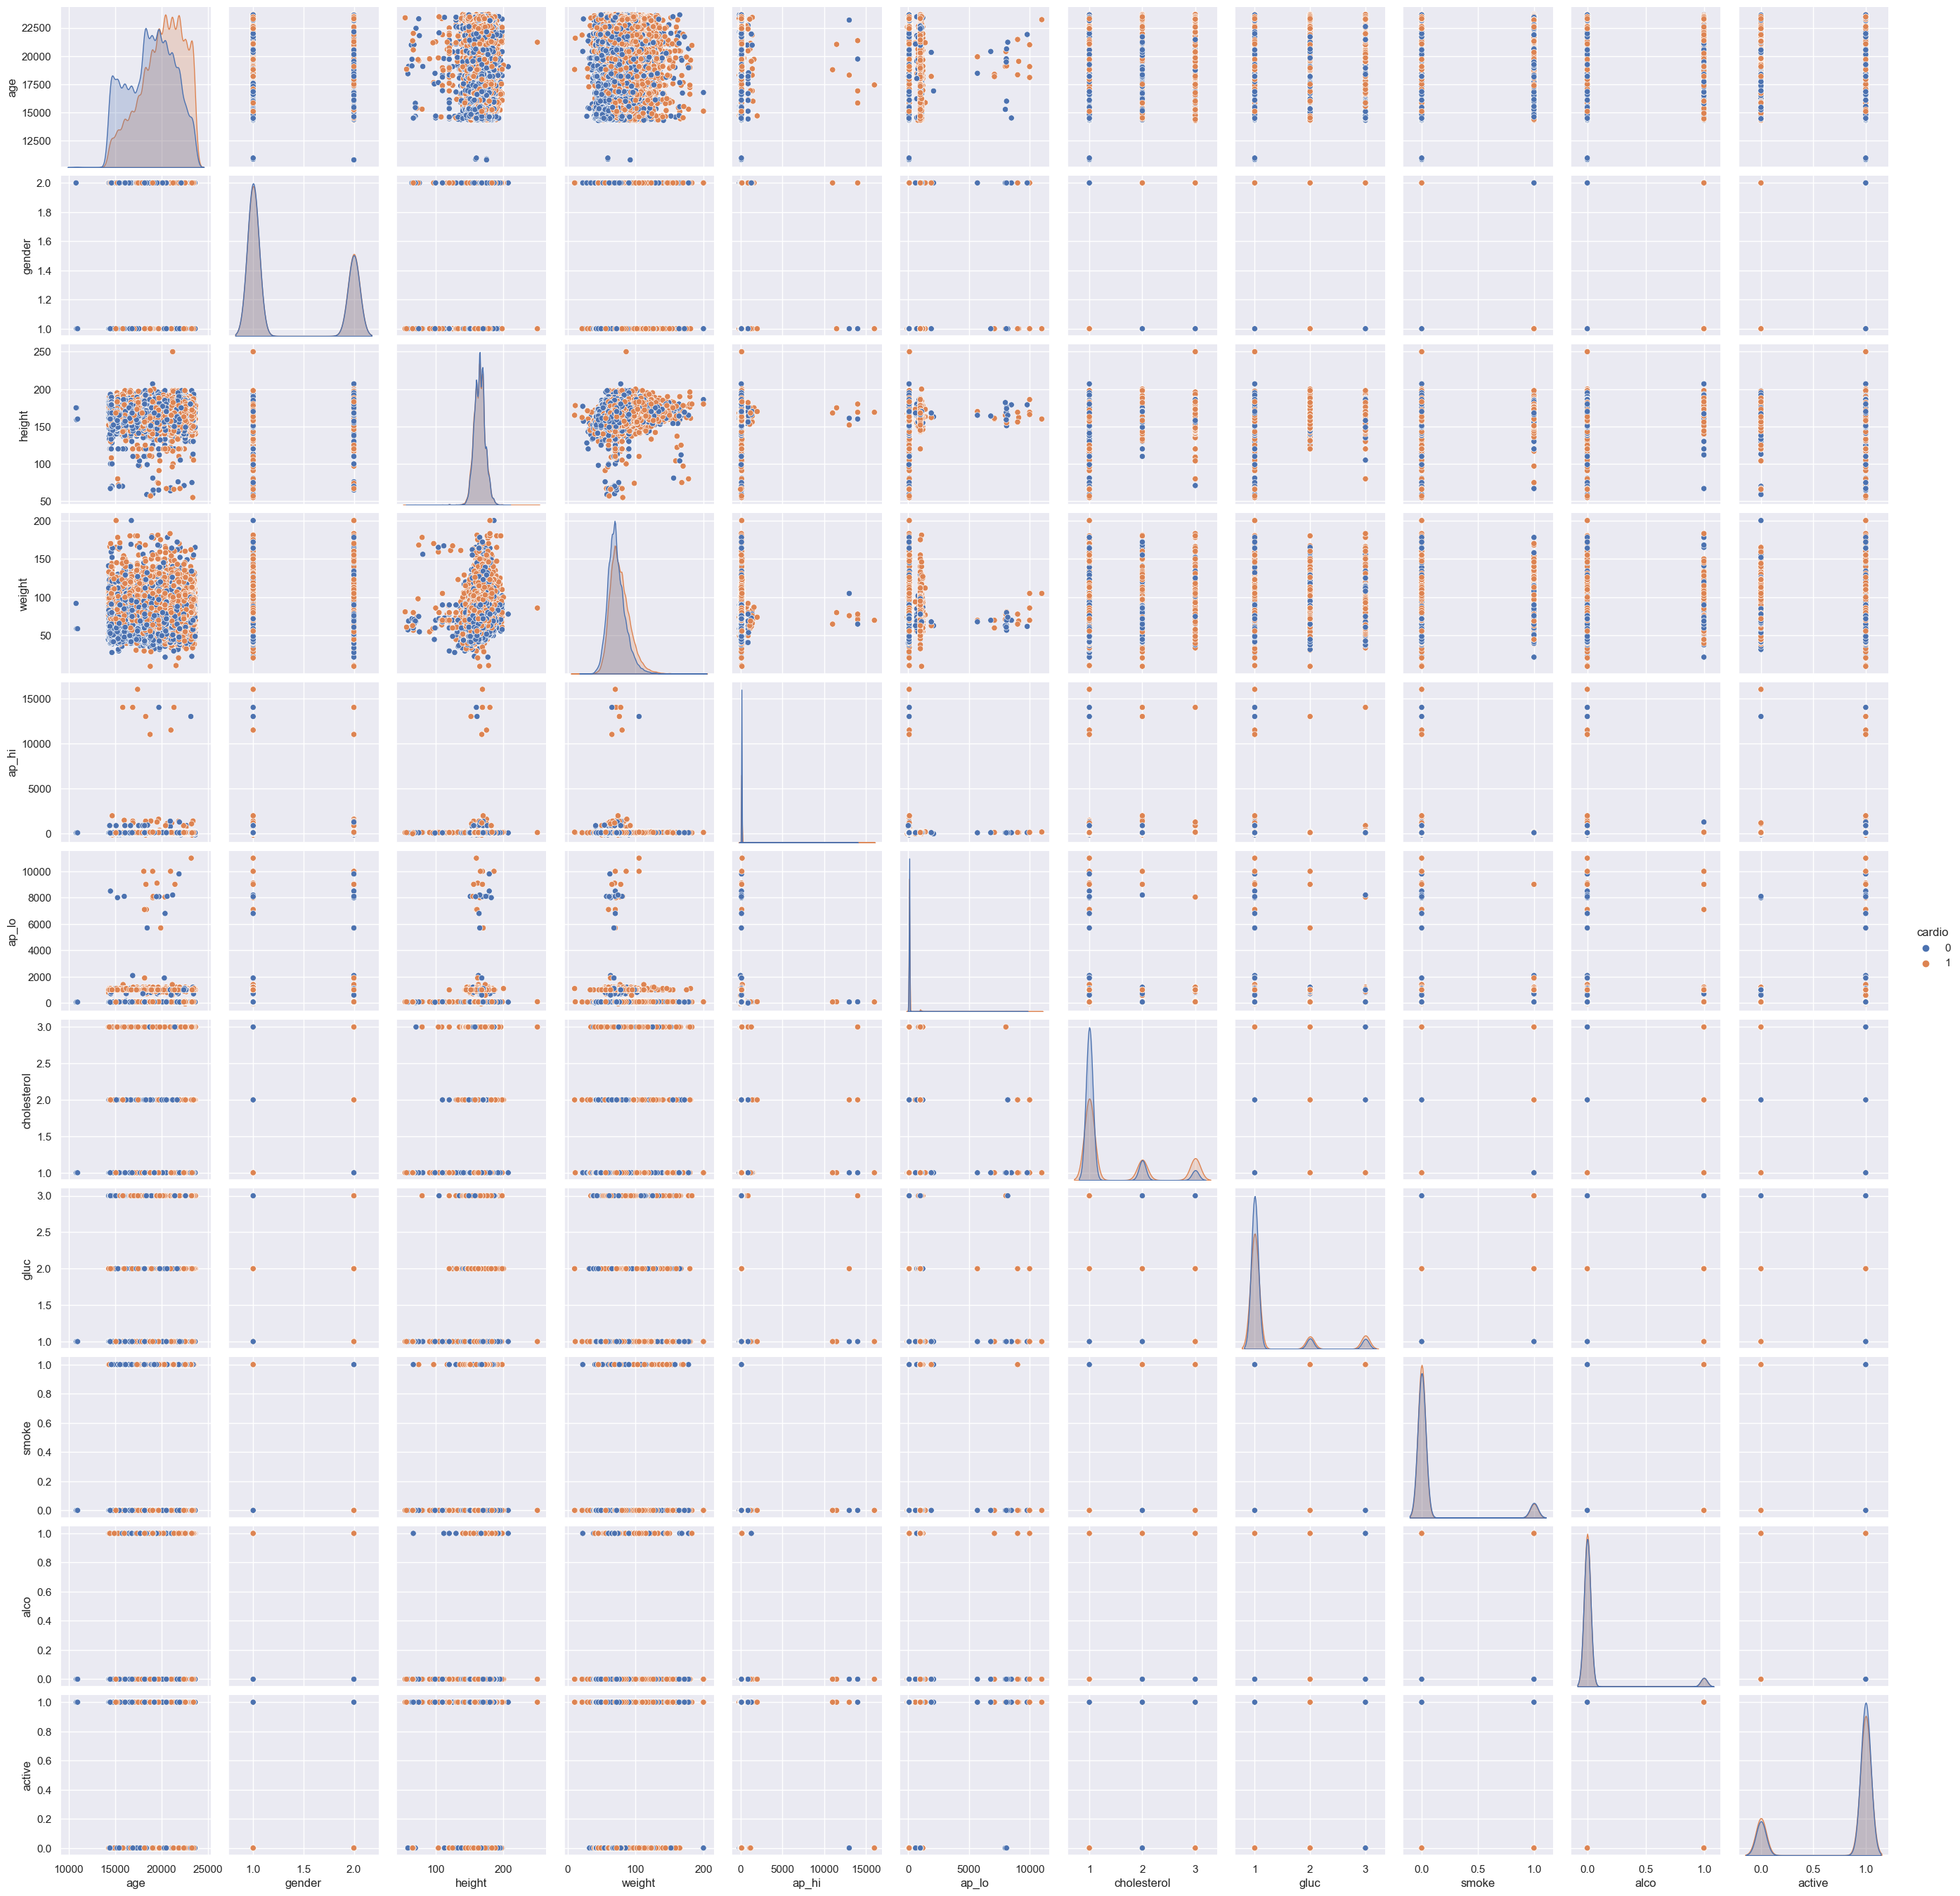

In [293]:
sns.set()
plt.figure(figsize = (30, 30))
sns.pairplot(df2, hue = 'cardio')
plt.show()

0    50.022865
1    49.977135
Name: cardio, dtype: float64


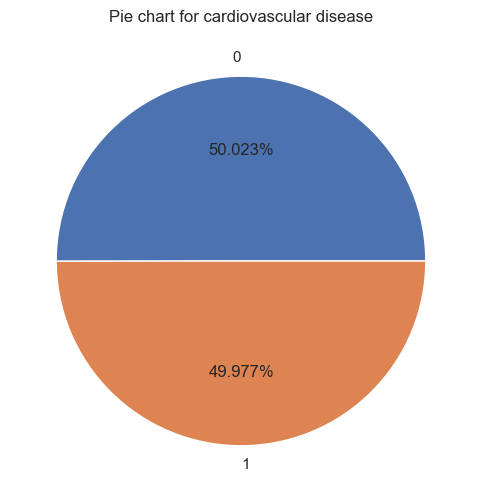

In [301]:
per_car = df2['cardio'].value_counts(normalize = True) * 100

print(per_car)

sns.set()
plt.figure(figsize = (6, 6))
plt.title('Pie chart for cardiovascular disease')
plt.pie(x = per_car, labels = ['0', '1'], autopct = '%1.3f%%')
plt.show()

1    65.035155
2    34.964845
Name: gender, dtype: float64


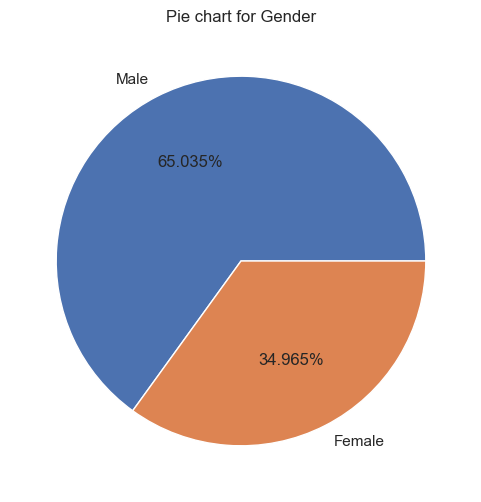

In [304]:
per_gen = df2['gender'].value_counts(normalize = True) * 100

print(per_gen)

sns.set()
plt.figure(figsize = (6, 6))
plt.title('Pie chart for Gender')
plt.pie(x = per_gen, labels = ['Male', 'Female'], autopct = '%1.3f%%')
plt.show()